# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.75;background-color:#00A693"><b>💕 Heart Failure Prediction</b><br></h1>

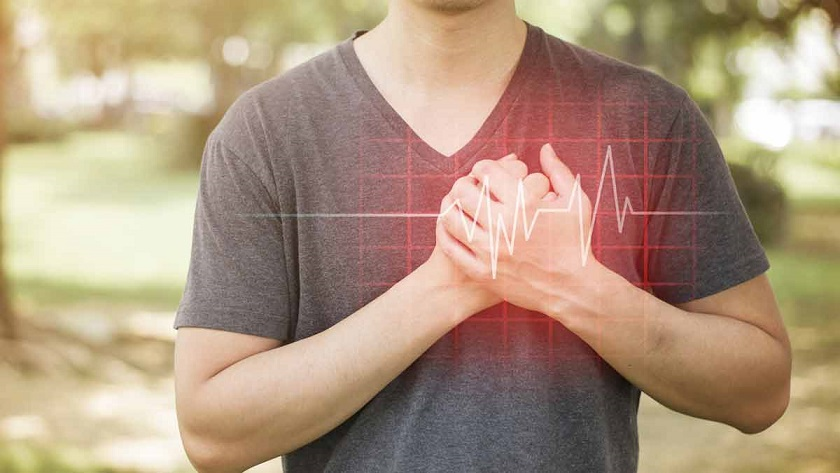

### Indroduction:

The term “heart disease” refers to several types of heart conditions. The most common type of heart disease in the United States is coronary artery disease (CAD), which affects the blood flow to the heart. Decreased blood flow can cause a heart attack.
Sometimes heart disease may be “silent” and not diagnosed until a person experiences signs or symptoms of a heart attack, heart failure, or an arrhythmia. When these events happen, symptoms may include1

Heart attack: Chest pain or discomfort, upper back or neck pain, indigestion, heartburn, nausea or vomiting, extreme fatigue, upper body discomfort, dizziness, and shortness of breath.
Arrhythmia: Fluttering feelings in the chest (palpitations).
Heart failure: Shortness of breath, fatigue, or swelling of the feet, ankles, legs, abdomen, or neck veins.

### AIM:

With this addition of science, we can make our daily work much easier through data science.
In that case, data science has contributed a lot in the field of medicine.  This model try to  predict People with cardiovascular disease or who are at high cardiovascular risk. The dataset is from 2020 annual CDC survey data of 400k adults related to their health status.

### Dataset Attributes

    1.HeartDisease: Respondents that have ever reported having
    coronary heart disease (CHD) or myocardial infarction (MI)

    2. BMI: Body Mass Index (BMI)
    3. Smoking: Have you smoked at least 100 cigarettes in your entire
    life? [Note: 5 packs = 100 cigarettes]
    4. AlcoholDrinking: Heavy drinkers (adult men having more than 14
    drinks per week and adult women having more than 7 drinks per
    week
    5. Stroke: (Ever told) (you had) a stroke?
    6. PhysicalHealth: Now thinking about your physical health, which
    includes physical illness and injury, for how many days during the
    past 30 days was your physical
    7. MentalHealth: Thinking about your mental health, for how many
    days during the past 30 days was your mental health not good?
    8. DiffWalking: Do you have serious difficulty walking or climbing
    stairs?
    9. Sex: Are you male or female?
    10. AgeCategory: Fourteen-level age category
    11. Race: Imputed race/ethnicity value
    12. Diabetic: (Ever told) (you had) diabetes?
    13. PhysicalActivity: Adults who reported doing physical activity
    or exercise during the past 30 days other than their regular job
    14. GenHealth: Would you say that in general your health is..
    15. SleepTime: On average, how many hours of sleep do you get
    in a 24-hour period?
    16. Asthma: (Ever told) (you had) asthma?
    17. Kidney Disease: Not including kidney stones, bladder
    infection or incontinence, were you ever told you had kidney
    disease?
    18. SkinCancer: (Ever told) (you had) skin cancer

#  <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b> Lets get started!</b><br></h1>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load and first look to DATA

In [2]:
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df.head()

HeartDisease   BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No 16.60     Yes              No     No            3.00   
1           No 20.34      No              No    Yes            0.00   
2           No 26.58     Yes              No     No           20.00   
3           No 24.21      No              No     No            0.00   
4           No 23.71      No              No     No           28.00   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0         30.00          No  Female        55-59  White      Yes   
1          0.00          No  Female  80 or older  White       No   
2         30.00          No    Male        65-69  White      Yes   
3          0.00          No  Female        75-79  White       No   
4          0.00         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good       5.00    Yes            No        Yes  
1              Yes  Very good       7.00     No            No         No  
2              Yes       Fair       8.00    Yes            No         No  
3               No       Good       6.00     No            No        Yes  
4              Yes  Very good       8.00     No            No         No

In [3]:
df.shape

(319795, 18)

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

18078

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(301717, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [10]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [11]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

#  <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b> Visualizing missing data.</b><br></h1>

<Axes: >

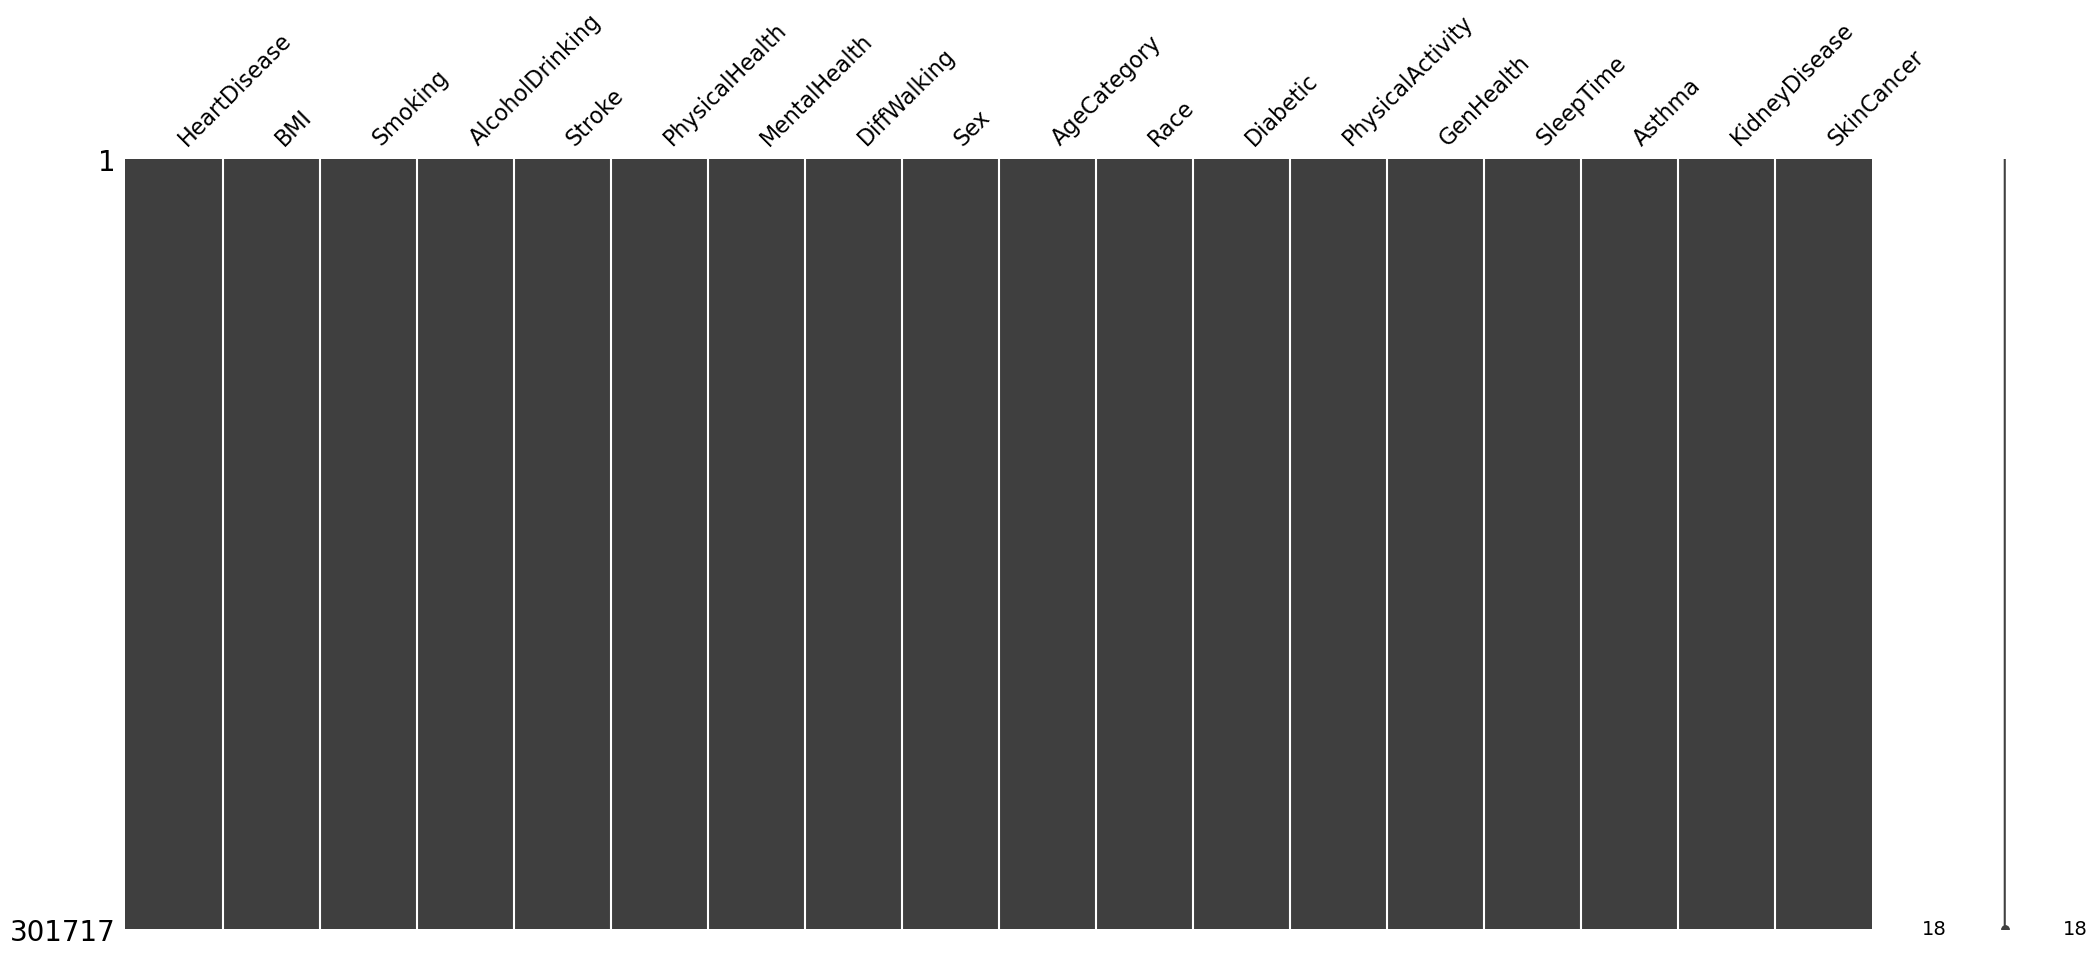

In [12]:
import missingno as msno
msno.matrix(df)

- There is no null value in this dataset

In [13]:
df.describe().T

count  mean  std   min   25%   50%   75%   max
BMI            301717.00 28.44 6.47 12.02 24.03 27.41 31.65 94.85
PhysicalHealth 301717.00  3.57 8.14  0.00  0.00  0.00  2.00 30.00
MentalHealth   301717.00  4.12 8.13  0.00  0.00  0.00  4.00 30.00
SleepTime      301717.00  7.08 1.47  1.00  6.00  7.00  8.00 24.00

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b> Encoding and Dividing Categorical feature , Numerical feature .</b><br></h1>

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : HeartDisease Smoking AlcoholDrinking Stroke DiffWalking Sex Race Diabetic PhysicalActivity GenHealth Asthma KidneyDisease SkinCancer
Numerical Features : BMI PhysicalHealth MentalHealth AgeCategory SleepTime


In [15]:
df.head() #Without Encoding

HeartDisease   BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No 16.60     Yes              No     No            3.00   
1           No 20.34      No              No    Yes            0.00   
2           No 26.58     Yes              No     No           20.00   
3           No 24.21      No              No     No            0.00   
4           No 23.71      No              No     No           28.00   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0         30.00          No  Female        55-59  White      Yes   
1          0.00          No  Female  80 or older  White       No   
2         30.00          No    Male        65-69  White      Yes   
3          0.00          No  Female        75-79  White       No   
4          0.00         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good       5.00    Yes            No        Yes  
1              Yes  Very good       7.00     No            No         No  
2              Yes       Fair       8.00    Yes            No         No  
3               No       Good       6.00     No            No        Yes  
4              Yes  Very good       8.00     No            No         No

In [16]:
df1.head() 

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0 16.60        1                0       0            3.00   
1             0 20.34        0                0       1            0.00   
2             0 26.58        1                0       0           20.00   
3             0 24.21        0                0       0            0.00   
4             0 23.71        0                0       0           28.00   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0         30.00            0    0        55-59     5         2   
1          0.00            0    0  80 or older     5         0   
2         30.00            0    1        65-69     5         2   
3          0.00            0    0        75-79     5         0   
4          0.00            1    0        40-44     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4       5.00       1              0           1  
1                 1          4       7.00       0              0           0  
2                 1          1       8.00       1              0           0  
3                 0          2       6.00       0              0           1  
4                 1          4       8.00       0              0           0

In [17]:
import pandas as pd

def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)
    
    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2
    
    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return float(age_min) + 10  # treats '80 or older' as 90

    return float(age)  # or any other default value you prefer

df1['AgeCategory'] = df1['AgeCategory'].apply(convert_age_range_to_mean)

- Age range covert to mean number.

In [18]:
df1.head()

HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0 16.60        1                0       0            3.00   
1             0 20.34        0                0       1            0.00   
2             0 26.58        1                0       0           20.00   
3             0 24.21        0                0       0            0.00   
4             0 23.71        0                0       0           28.00   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0         30.00            0    0        57.00     5         2   
1          0.00            0    0        90.00     5         0   
2         30.00            0    1        67.00     5         2   
3          0.00            0    0        77.00     5         0   
4          0.00            1    0        42.00     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4       5.00       1              0           1  
1                 1          4       7.00       0              0           0  
2                 1          1       8.00       1              0           0  
3                 0          2       6.00       0              0           1  
4                 1          4       8.00       0              0           0

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Exploratory Data Analysis</b><br></h1>

### Target Variable Visualization (HeartDisease) :

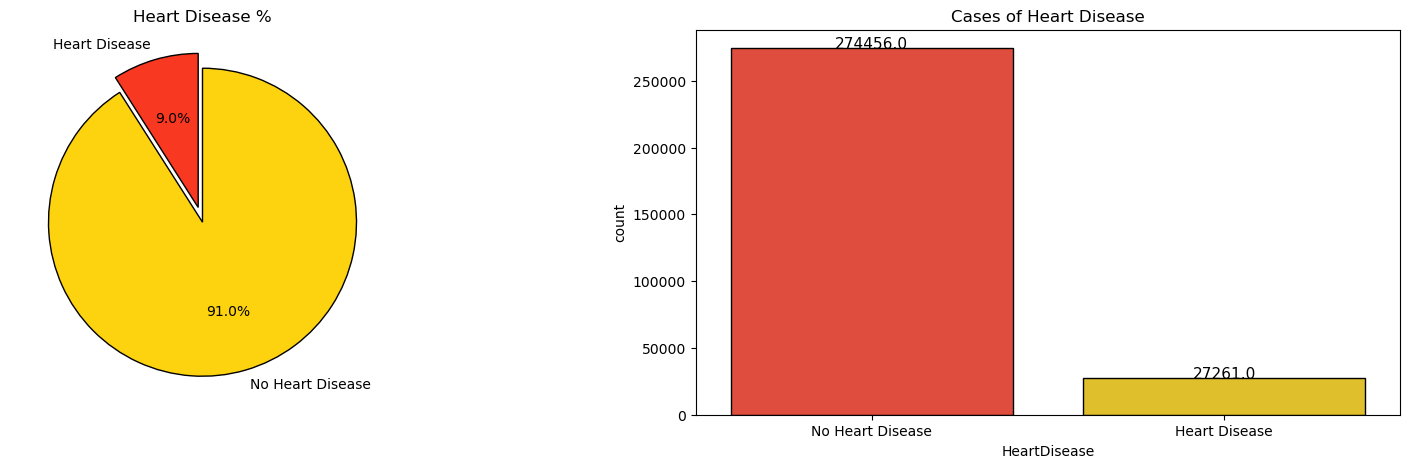

In [19]:
colors = ['#F93822','#FDD20E']
l = list(df1['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Heart Disease','No Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'HeartDisease',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

- Dataset is not balanced. We should try balanced dataset before fit model.

### Distribution of Categorical Features :

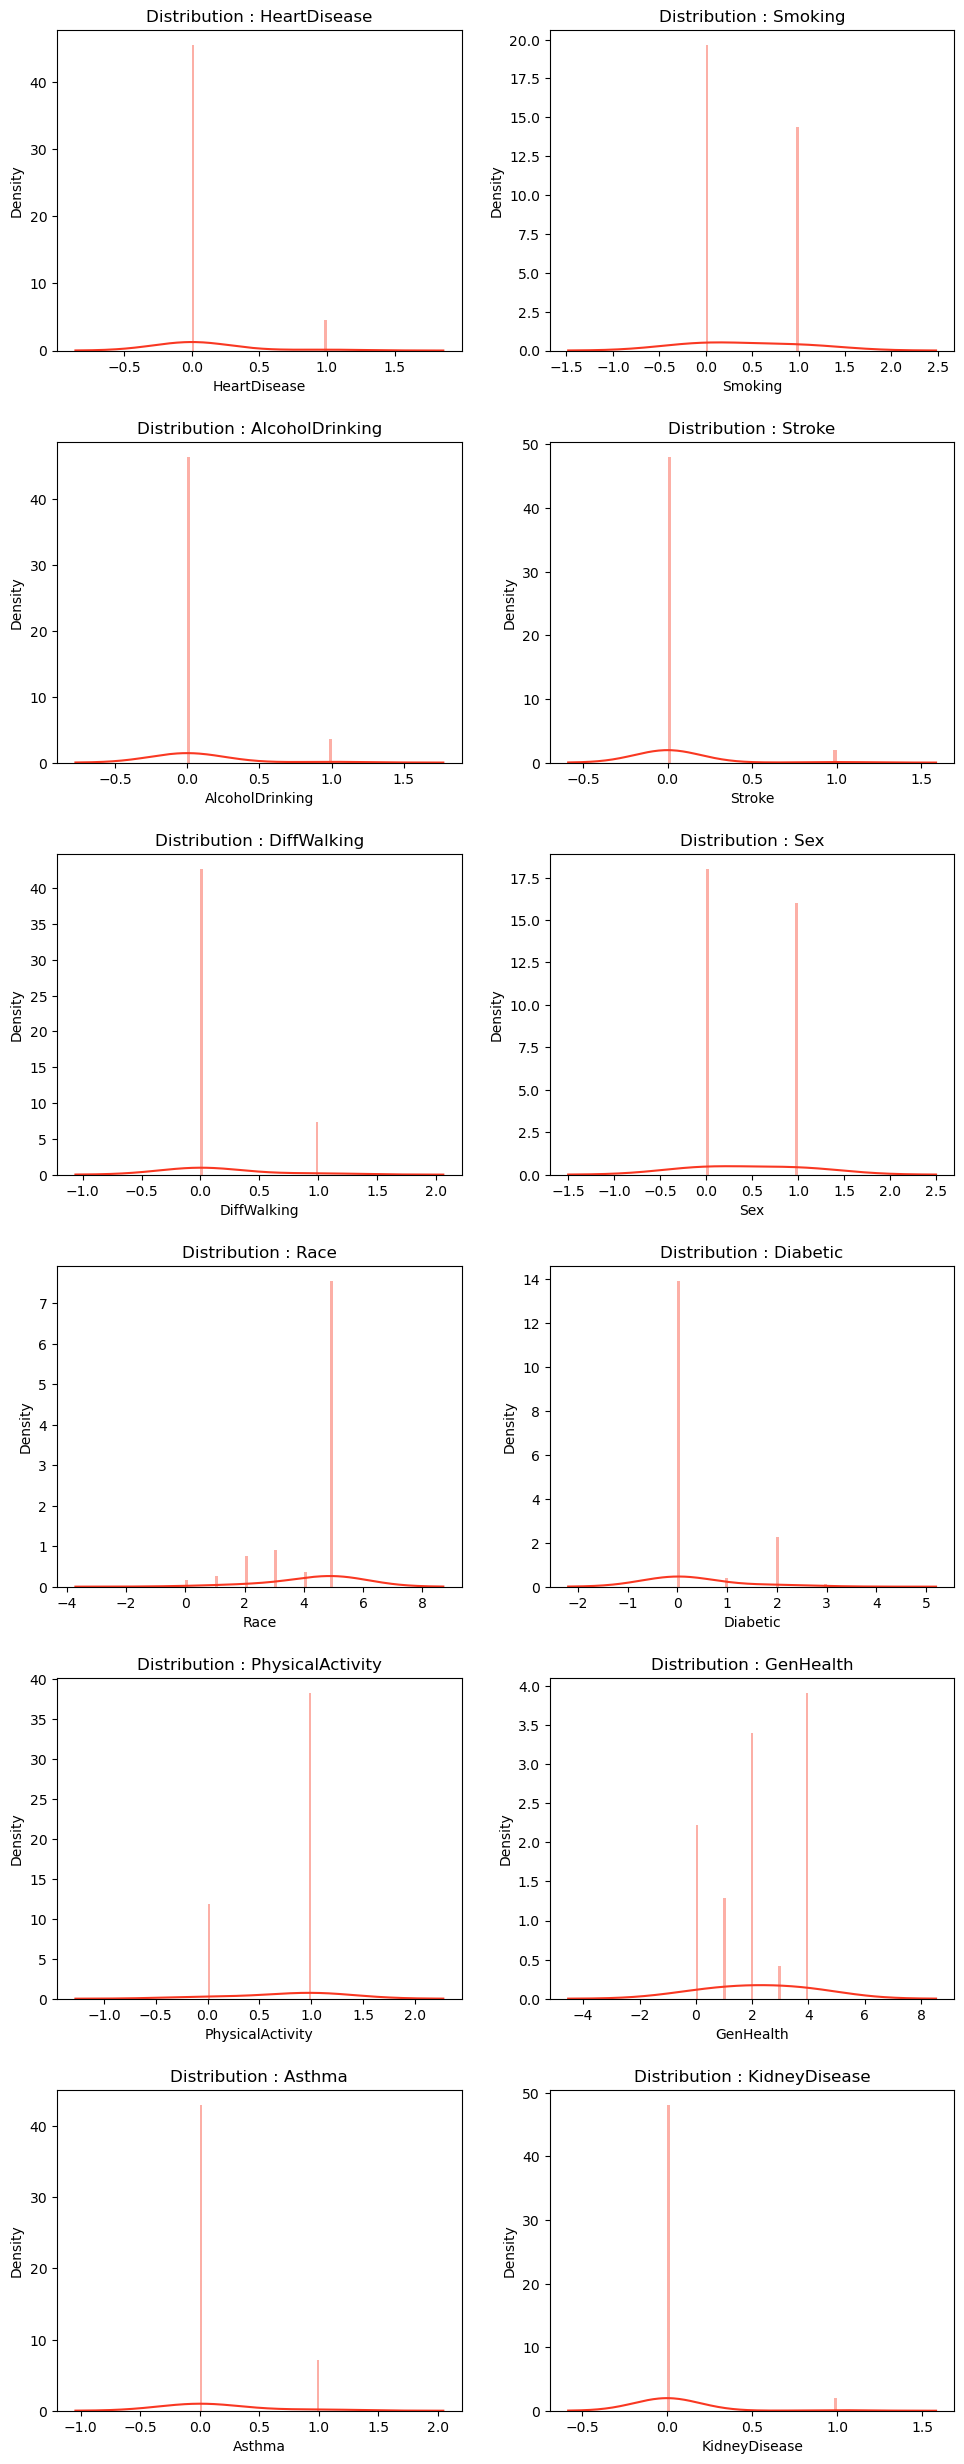

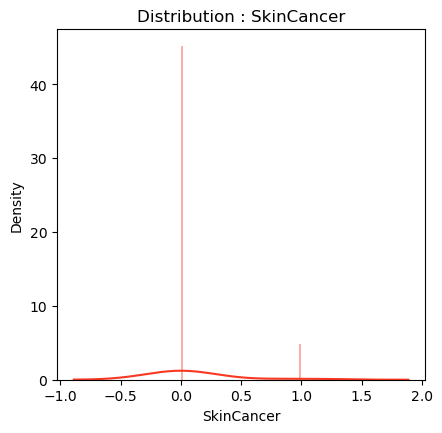

In [20]:
fig, ax = plt.subplots(nrows = 6,ncols = 2,figsize = (10,25))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(6,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
fig.tight_layout(pad = 2)   

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

- All the categorical features are near about Normally Distributed.

### Distribution of Numerical Features :

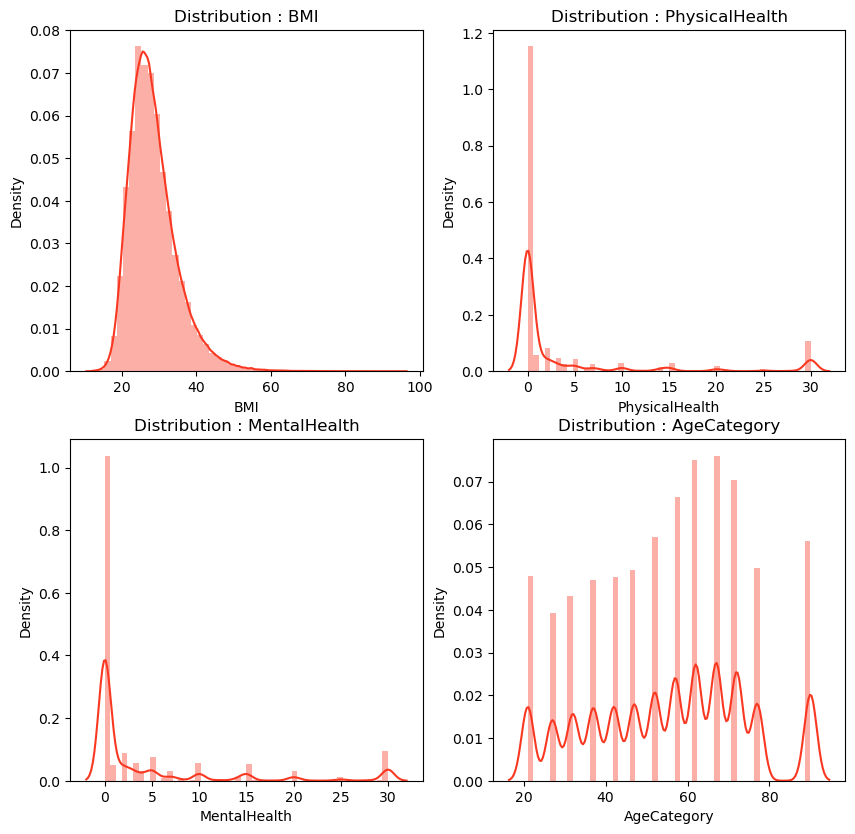

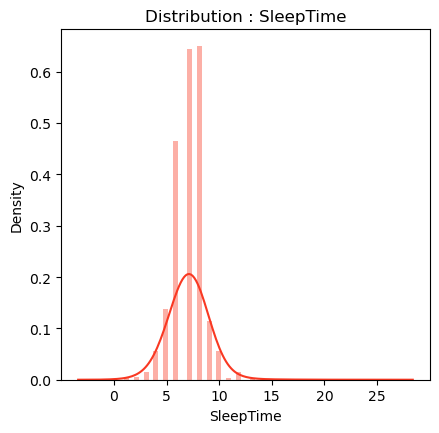

In [21]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- BMI, PhysicalHealth, MentalHealth is Right Skewed 
- Agecategory is bidmodal data distribution.
- SleepTime is Normally distributed.

### Categorical Features vs Positive Heart Disease Cases 

In [22]:
import plotly.graph_objects as go
import numpy as np

# Filter out only positive cases of HeartDisease
positive_hd_df = df[df['HeartDisease'] == 'Yes']

columns = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Race", 
           "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", 
           "KidneyDisease", "SkinCancer"]

for column in columns:
    # Get value counts for current column among positive HeartDisease cases
    column_counts = positive_hd_df[column].value_counts()

    # Plotting the pie chart
    fig = go.Figure(data=[go.Pie(labels=column_counts.index,
                                 values=column_counts.values,
                                 hole=.35,
                                 textinfo='label+percent',
                                 marker_colors=colors)])
    
    title_text = f"{column} Distribution Among Positive HeartDisease Cases"
    fig.update_layout(title=title_text, font=dict(size=14), showlegend=True)
    fig.show()


- Out of all the heart disease patients, 58.6% peaple smoker and 41.4% people non smoker
- Here 58.9% Male are affected HeartDisease from Female
- When it comes to the type of Race there 82.2% White people have HeartDisease

### Numerical Features vs Target Variable (HeartDisease) 

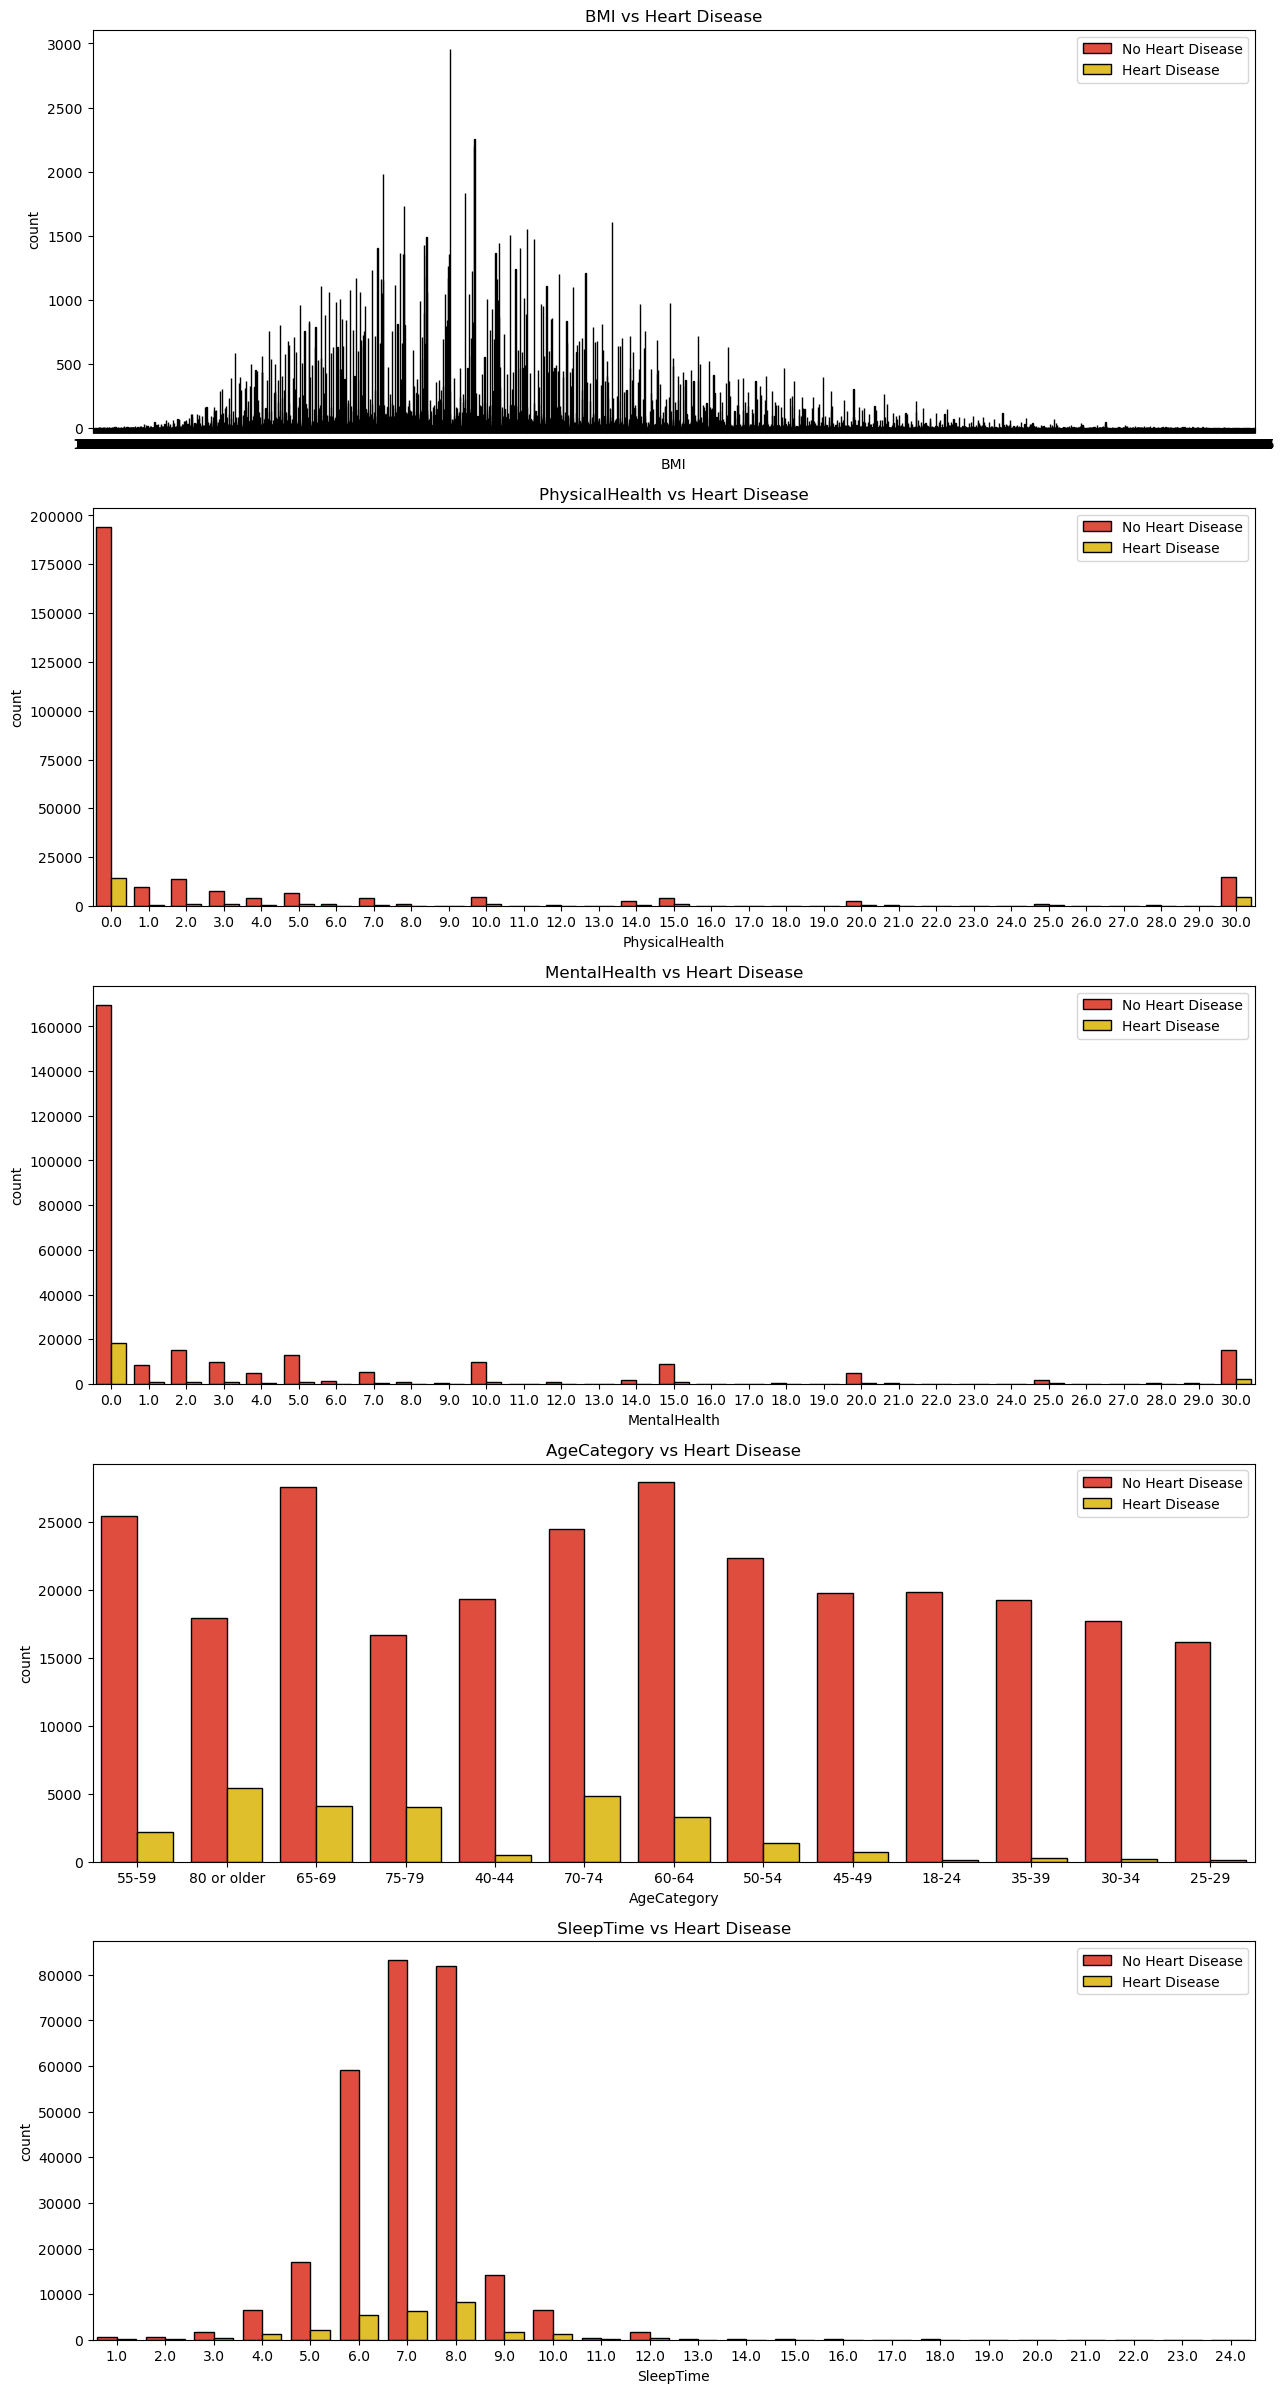

In [23]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=numerical_features[i],data = df,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

#### Smoking vs Numerical Features :

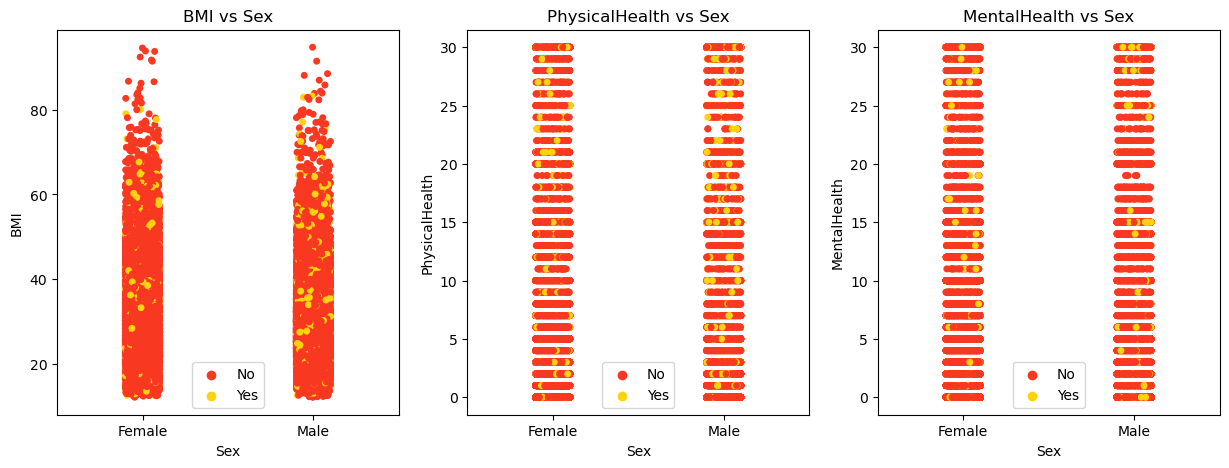

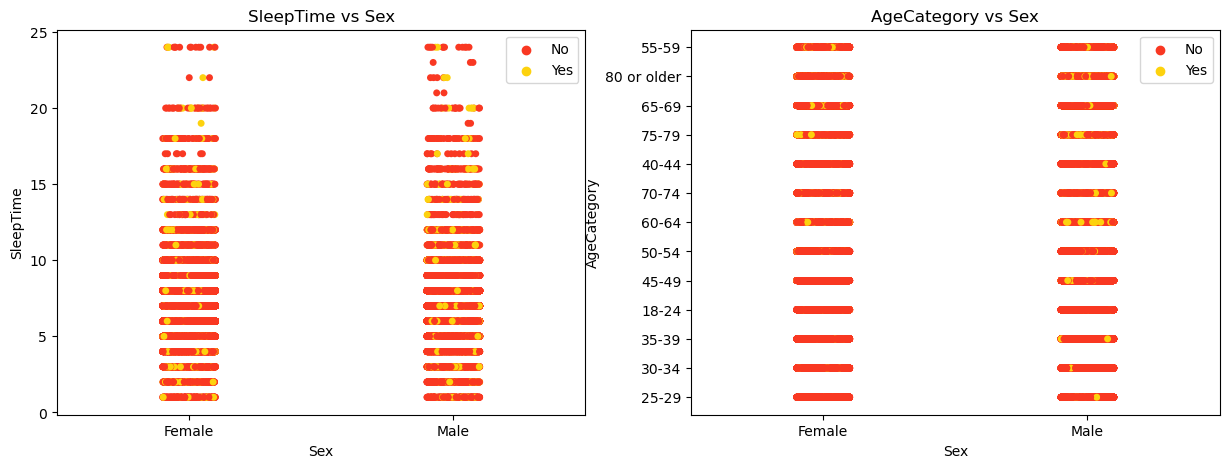

In [24]:
from matplotlib.patches import Patch

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);


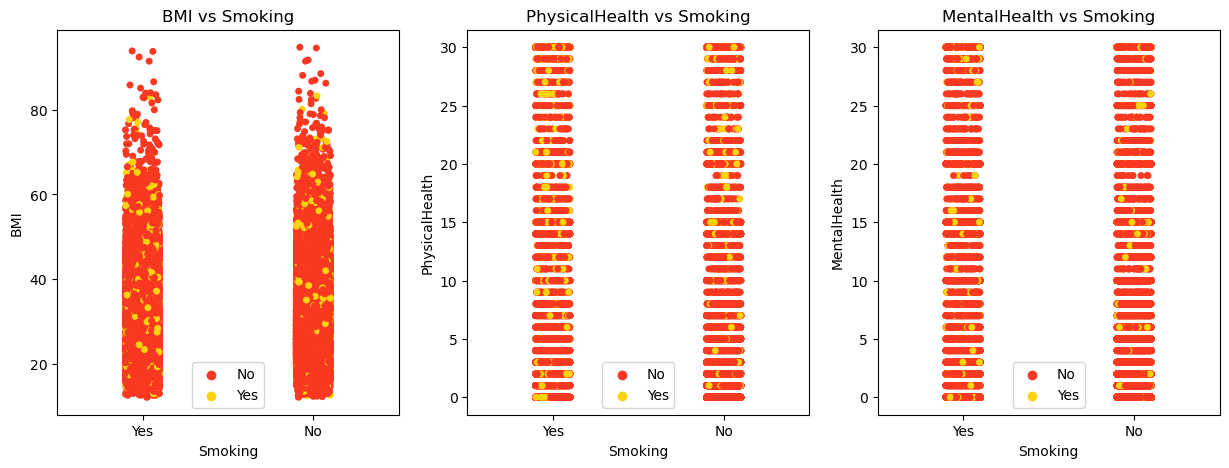

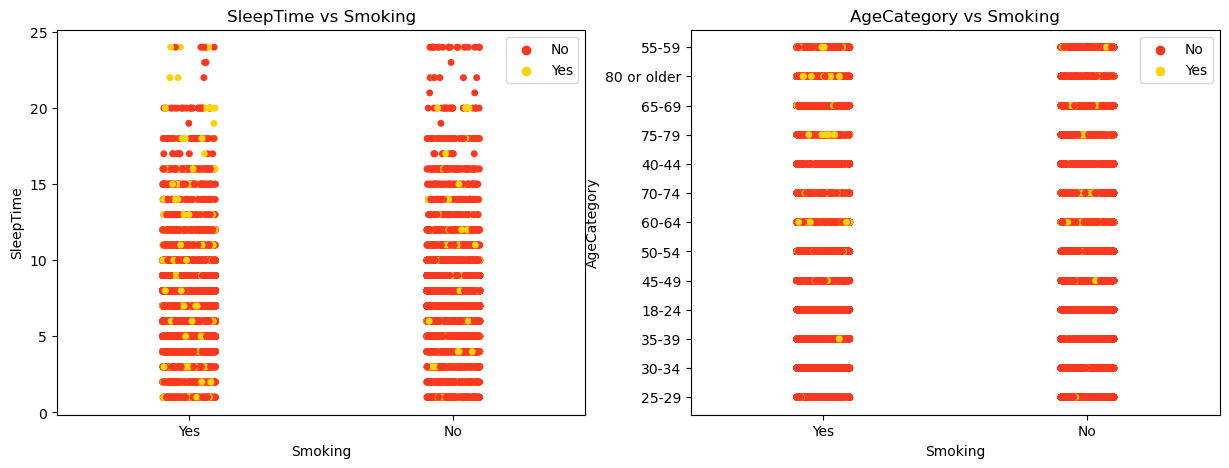

In [25]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Smoking',y = numerical_features[i],data = df,hue = 'HeartDisease', palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Smoking' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Smoking',y = numerical_features[i],data = df,hue = 'HeartDisease', palette = colors);
    plt.legend() 
    title = numerical_features[i] + ' vs Smoking' 
    plt.title(title);

#### AlcoholDrinking vs Numerical Features :

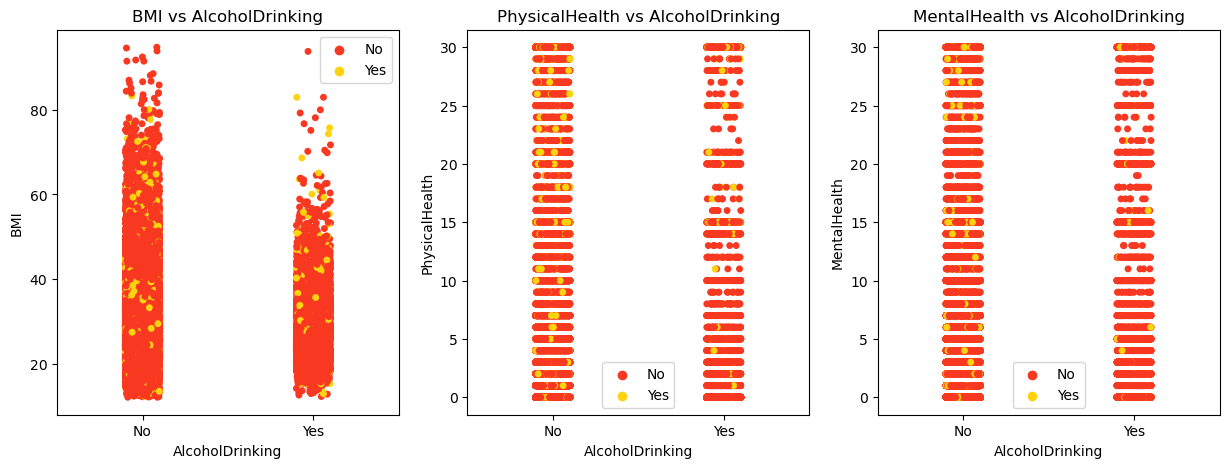

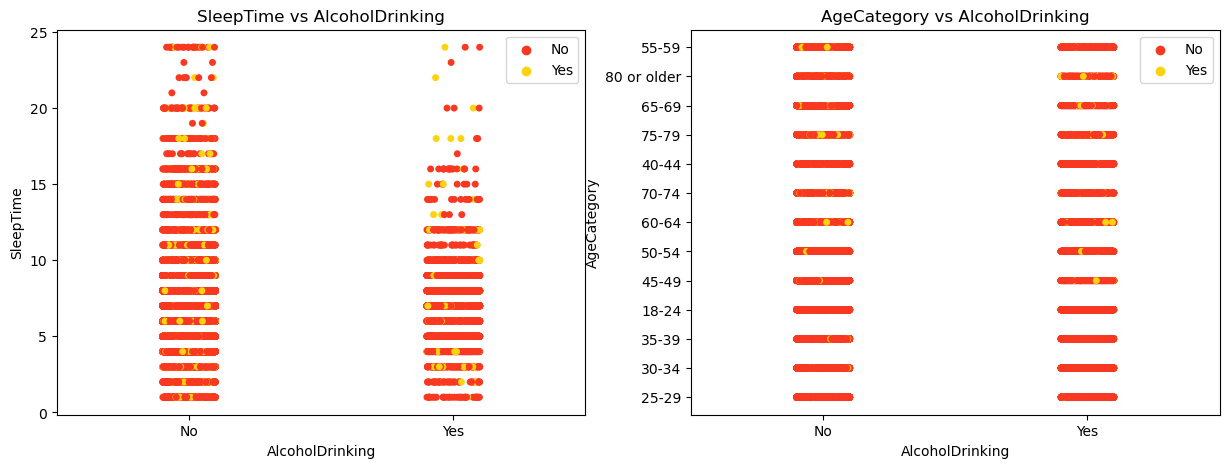

In [26]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'AlcoholDrinking',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs AlcoholDrinking' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'AlcoholDrinking',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs AlcoholDrinking' 
    plt.title(title);

#### Stroke vs Numerical Features :

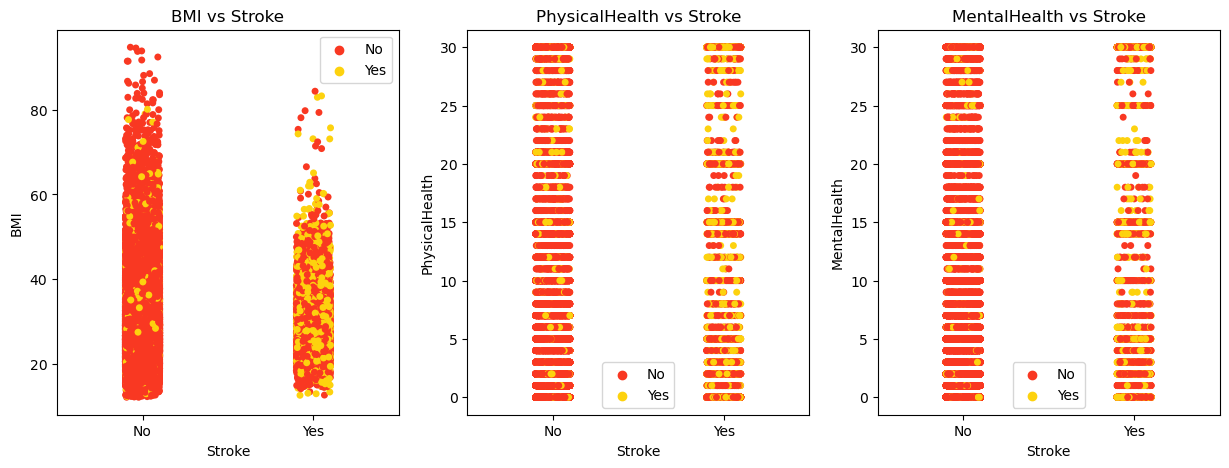

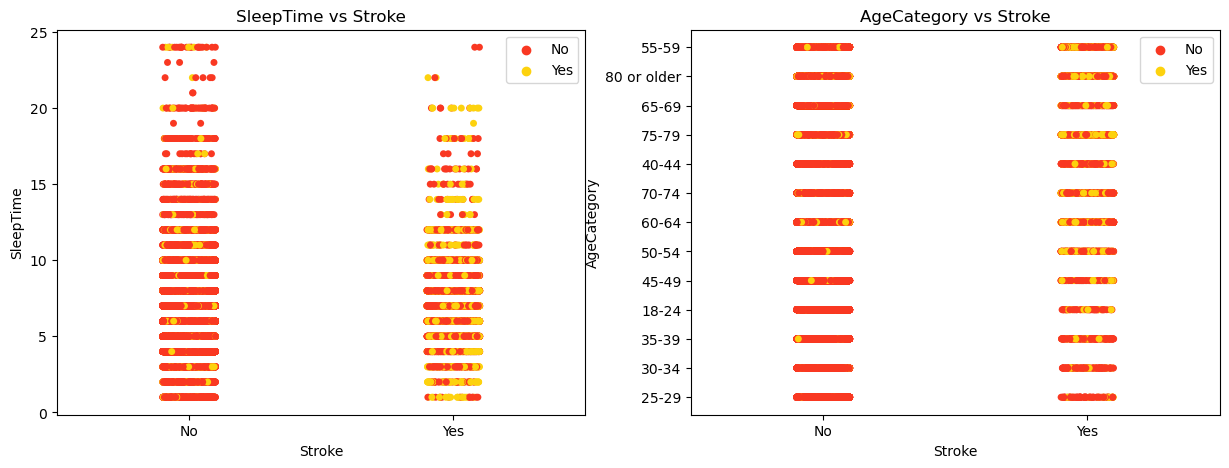

In [27]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Stroke',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Stroke' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Stroke',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Stroke' 
    plt.title(title);

#### DiffWalking vs Numerical Features :

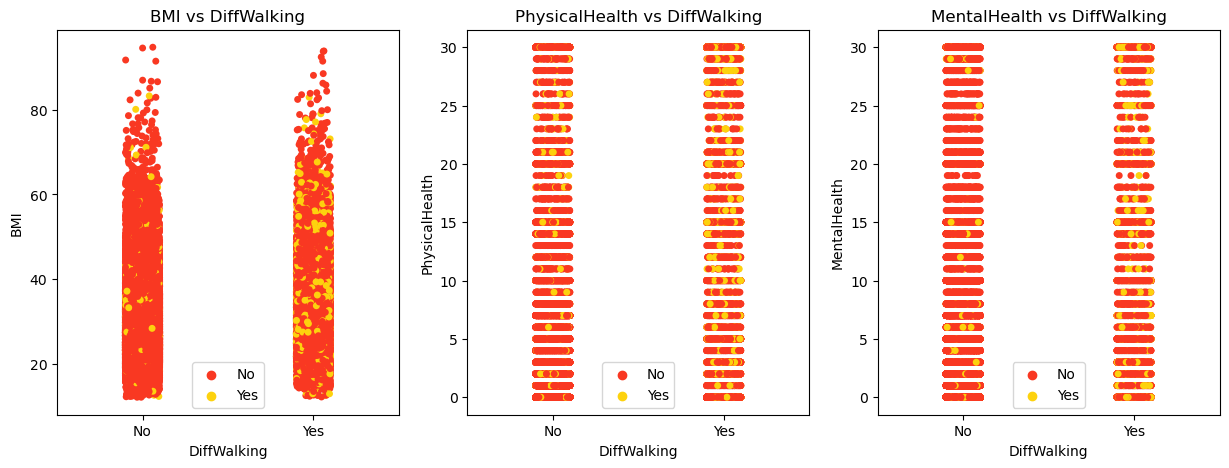

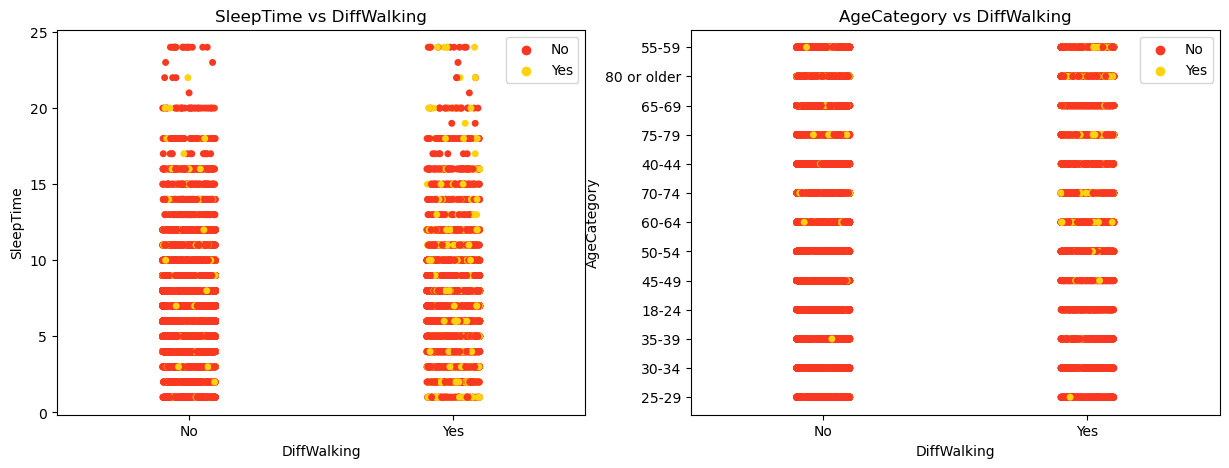

In [28]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'DiffWalking',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs DiffWalking' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'DiffWalking',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs DiffWalking' 
    plt.title(title);

#### Sex vs Numerical Features :

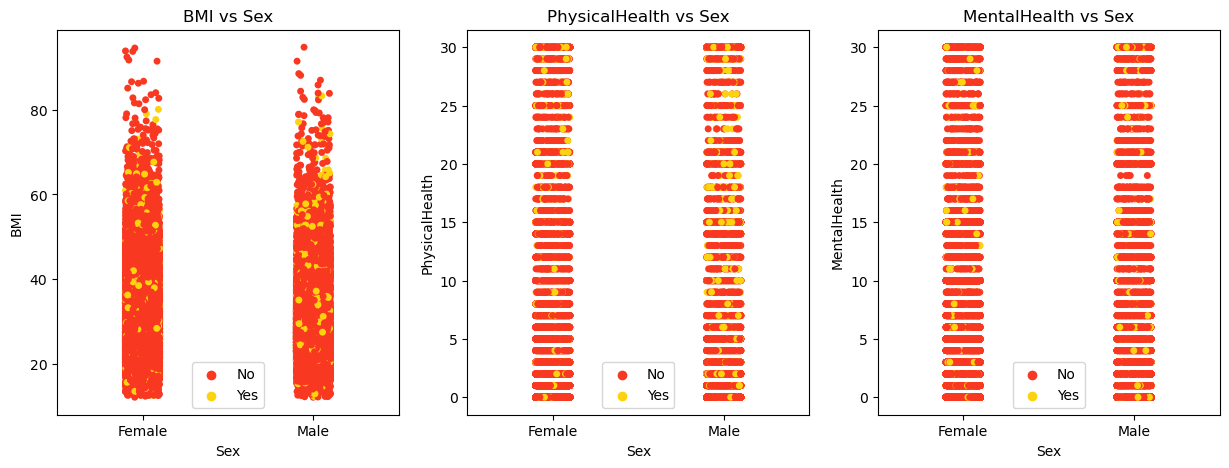

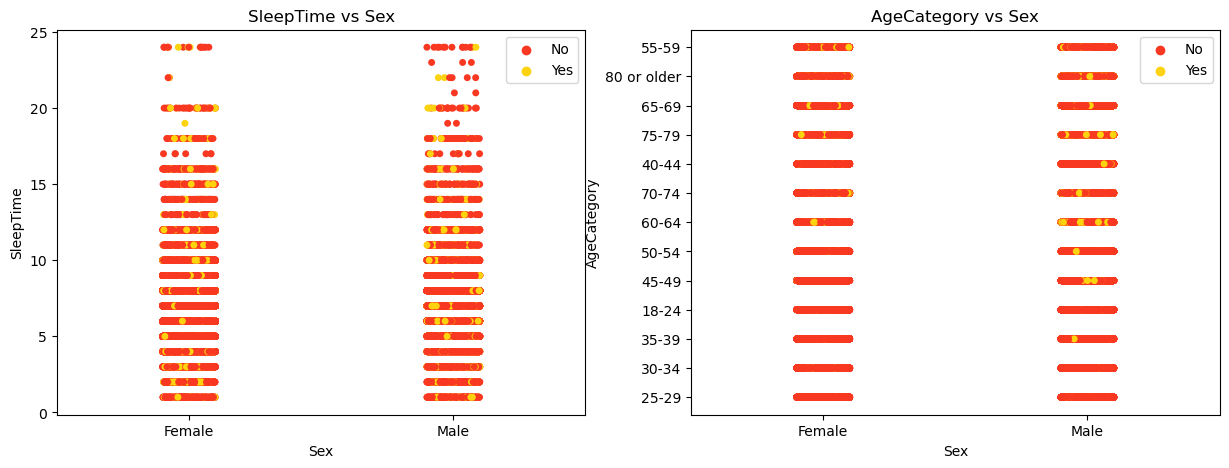

In [29]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

#### Race vs Numerical Features :

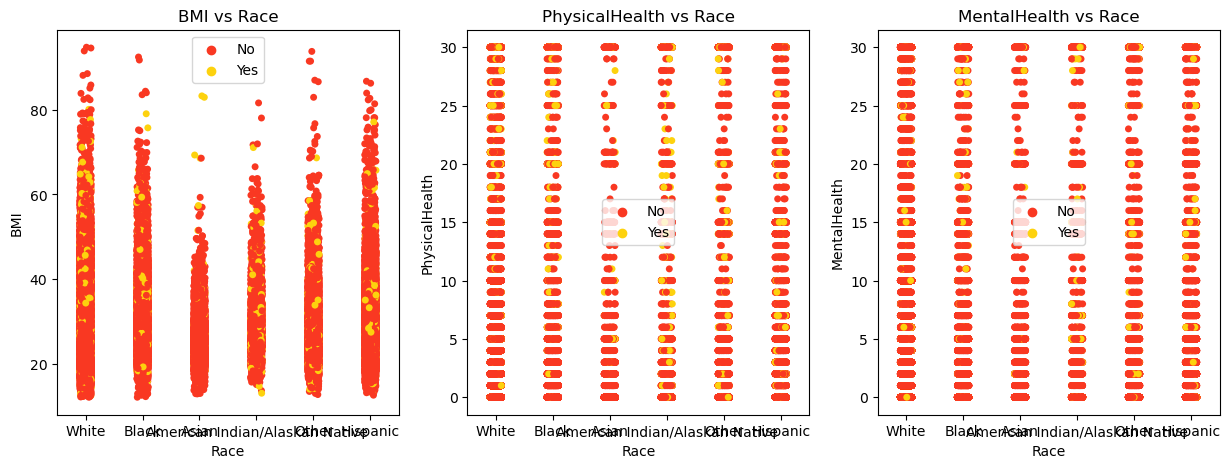

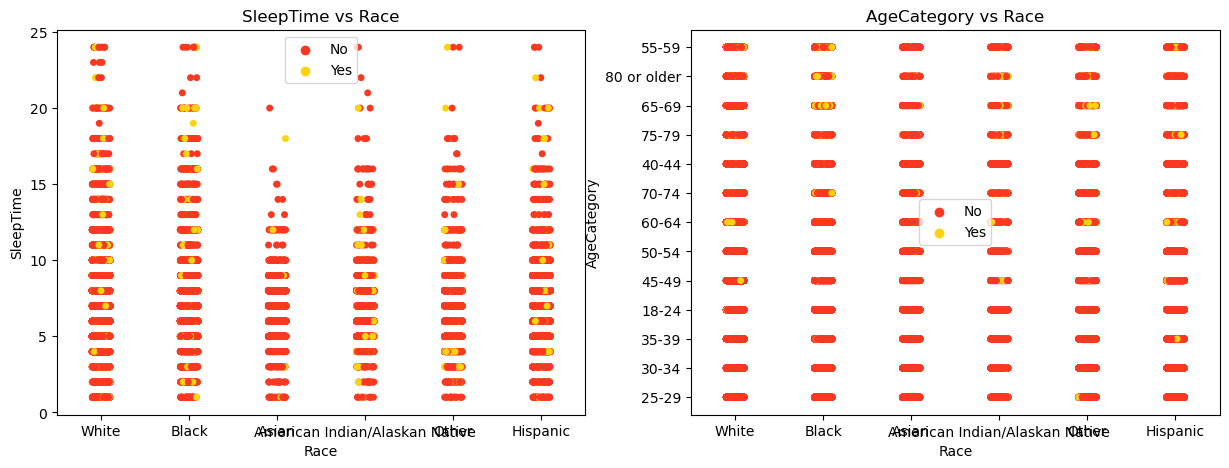

In [30]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Race',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Race' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Race',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Race' 
    plt.title(title);

#### Diabetic vs Numerical Features :

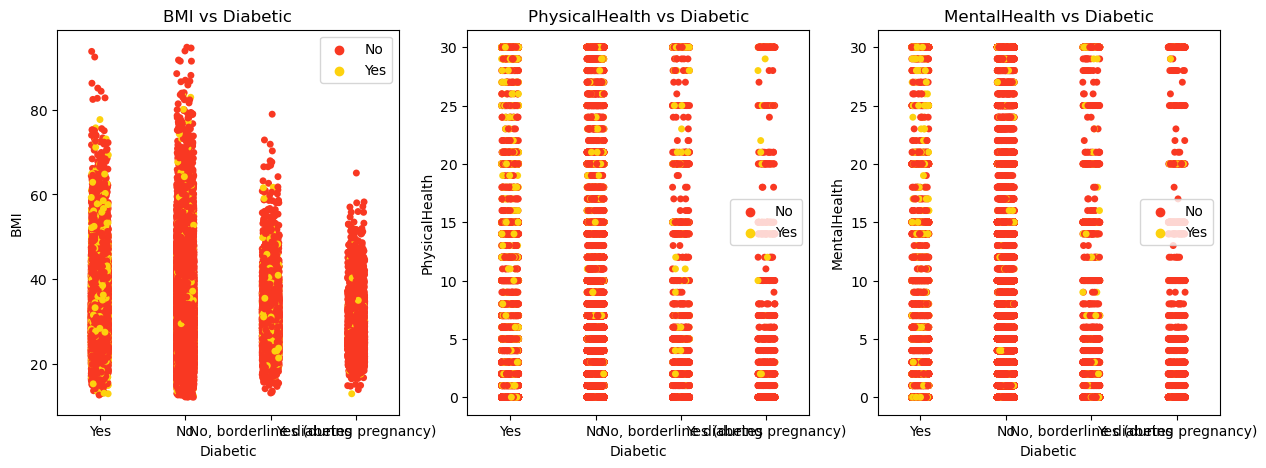

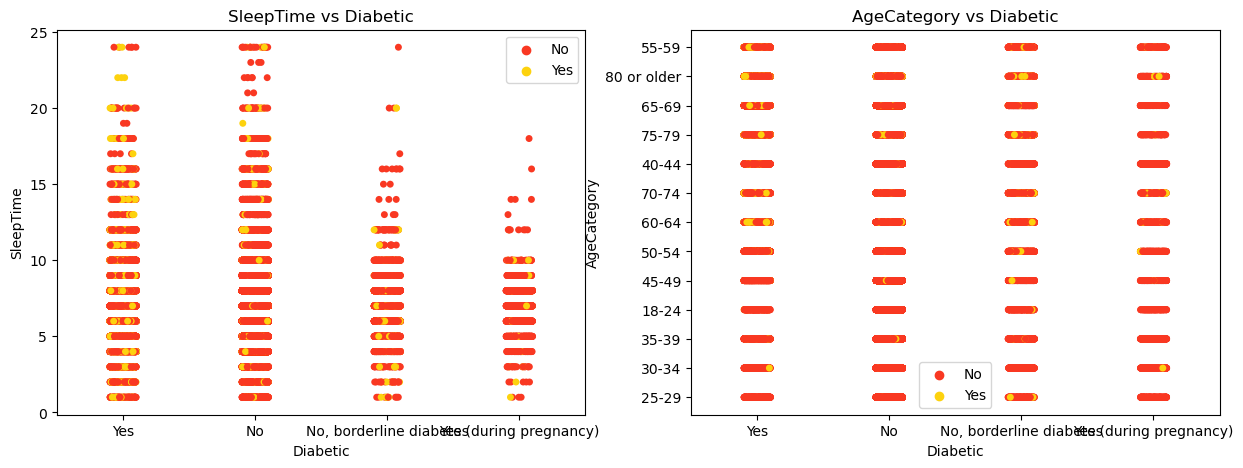

In [31]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Diabetic',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Diabetic' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Diabetic',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Diabetic' 
    plt.title(title);

#### PhysicalActivity vs Numerical Features :

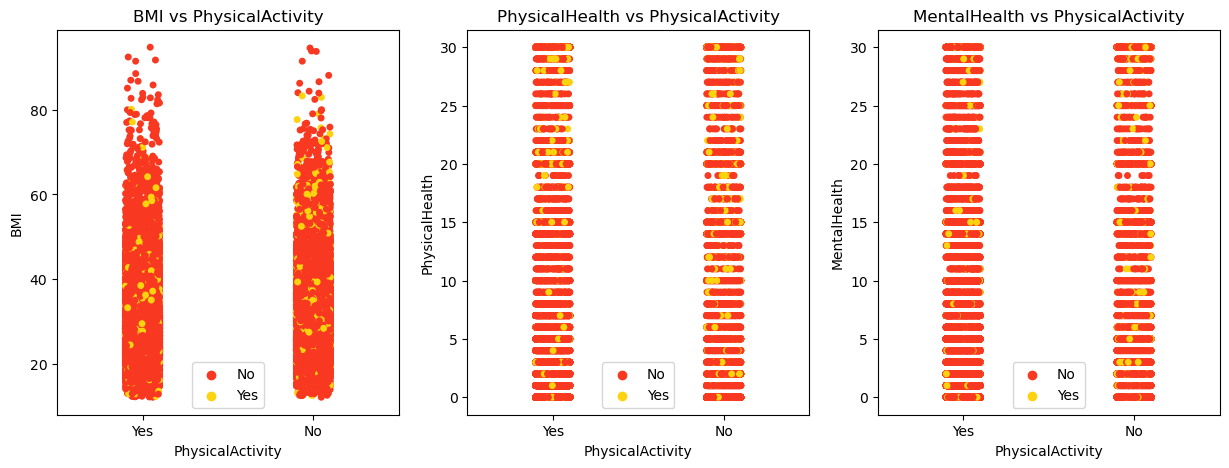

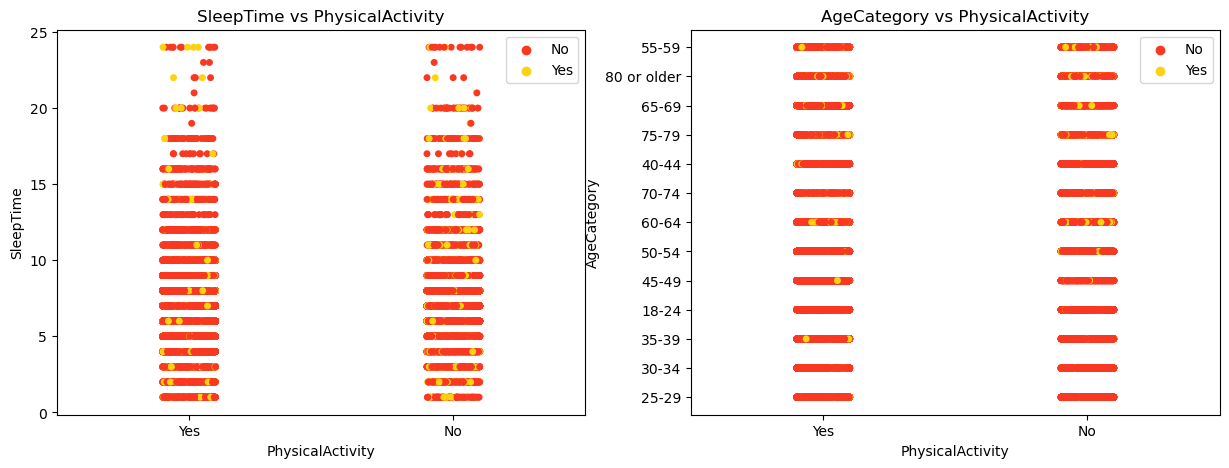

In [32]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'PhysicalActivity',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs PhysicalActivity' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'PhysicalActivity',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs PhysicalActivity' 
    plt.title(title);

#### GenHealth vs Numerical Features :

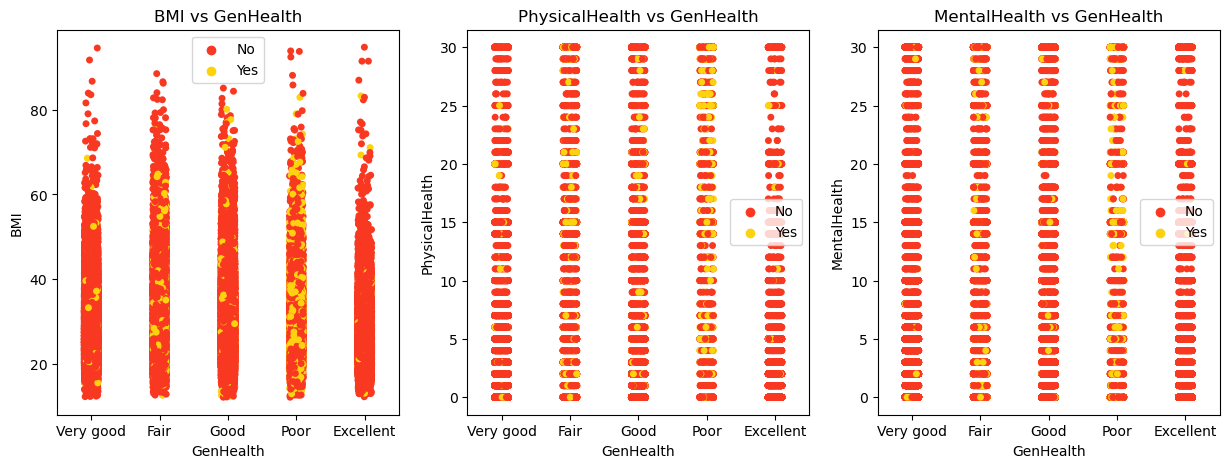

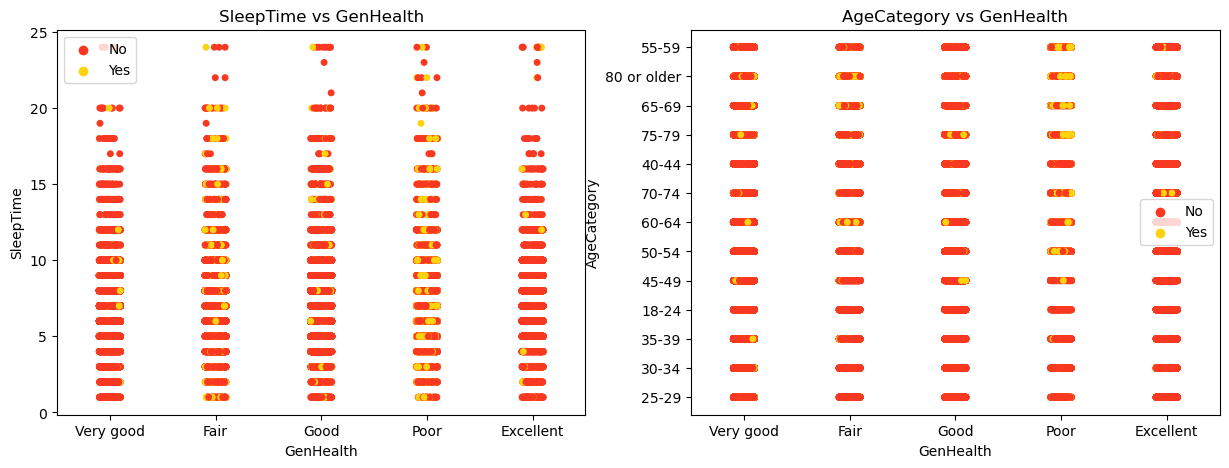

In [33]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'GenHealth',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs GenHealth' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'GenHealth',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs GenHealth' 
    plt.title(title);

#### Asthma vs Numerical Features :

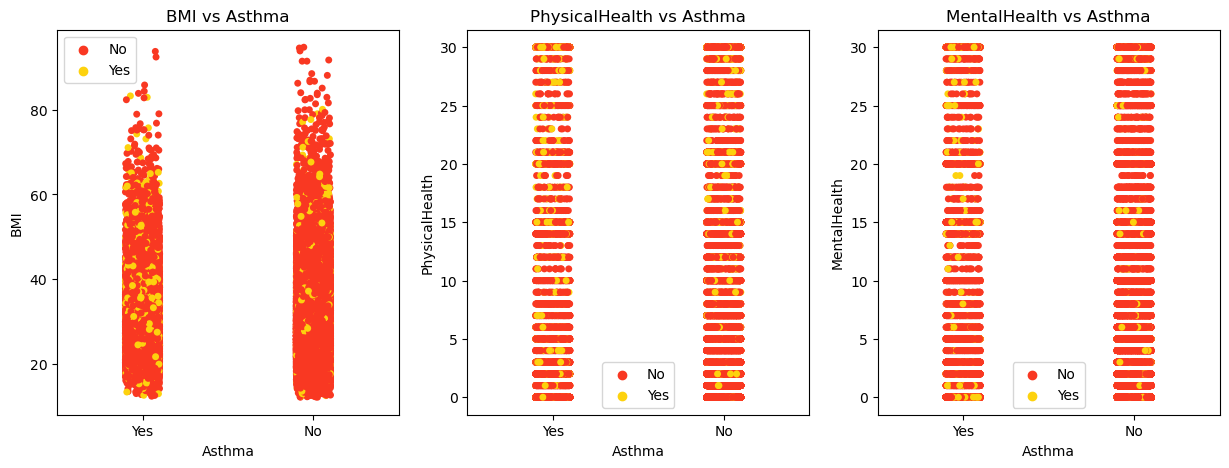

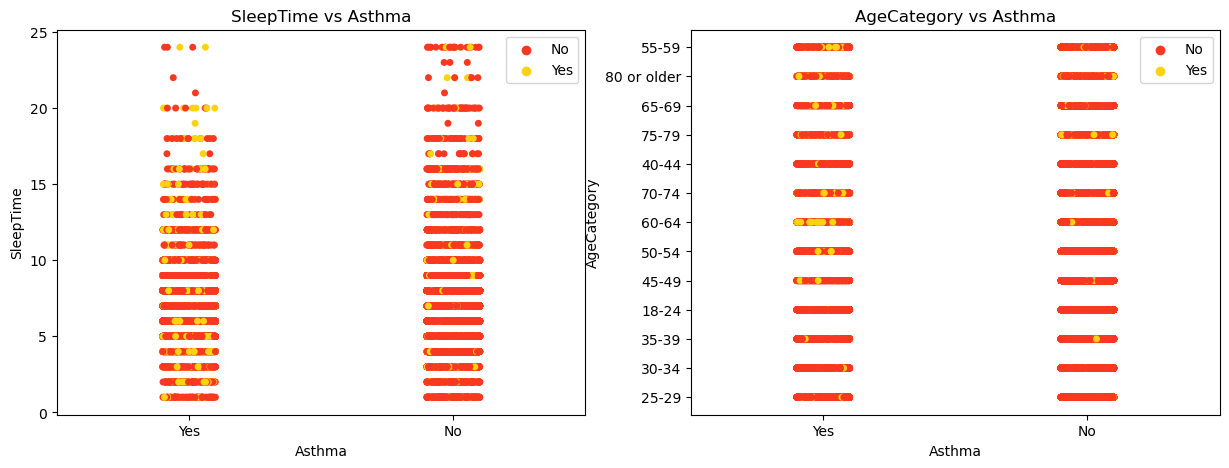

In [34]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Asthma',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Asthma' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Asthma',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs Asthma' 
    plt.title(title);

#### KidneyDisease vs Numerical Features :

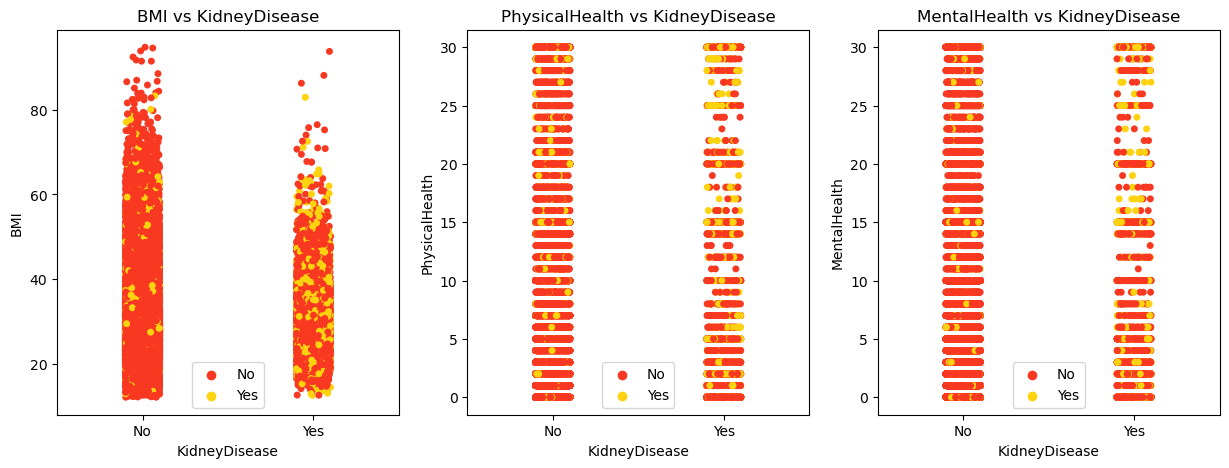

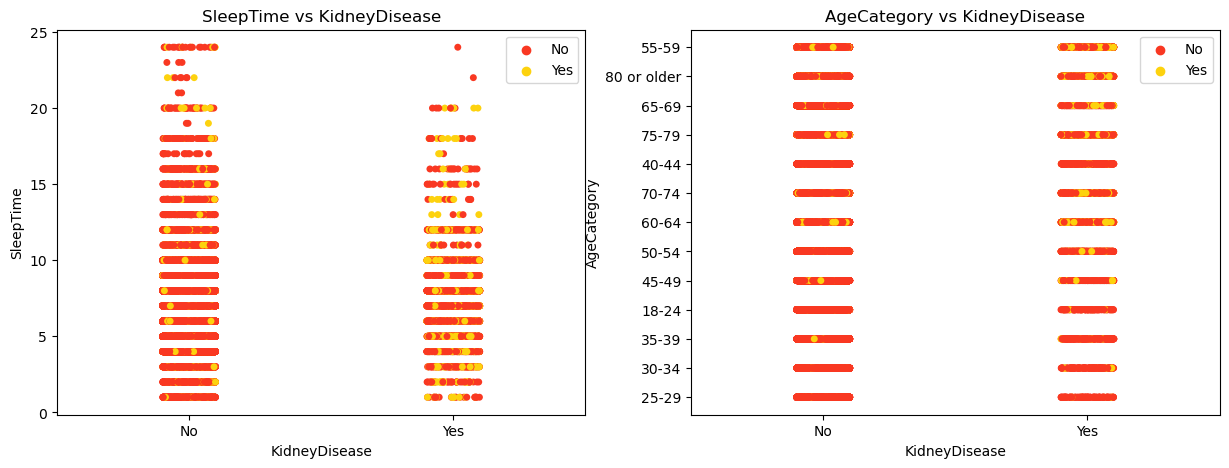

In [35]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'KidneyDisease',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs KidneyDisease' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'KidneyDisease',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs KidneyDisease' 
    plt.title(title);

### SkinCancer vs Numerical Features :

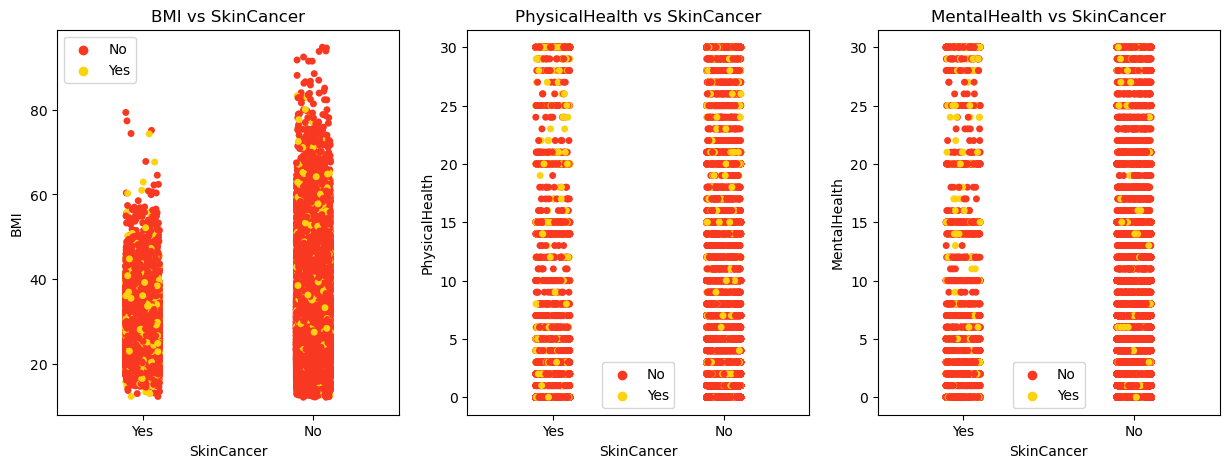

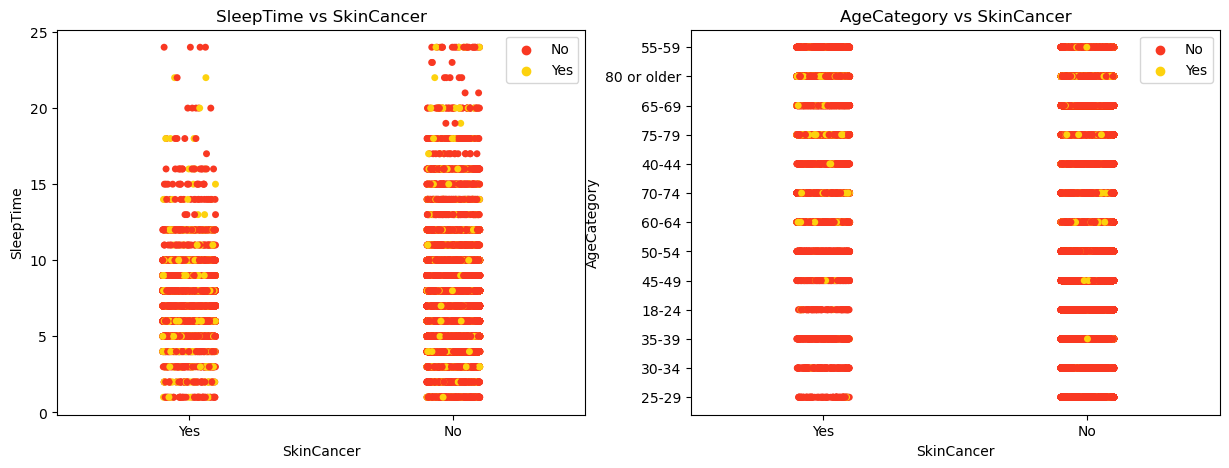

In [36]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'SkinCancer',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs SkinCancer' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'SkinCancer',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = colors);
    plt.legend()
    title = numerical_features[i] + ' vs SkinCancer' 
    plt.title(title);

#### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

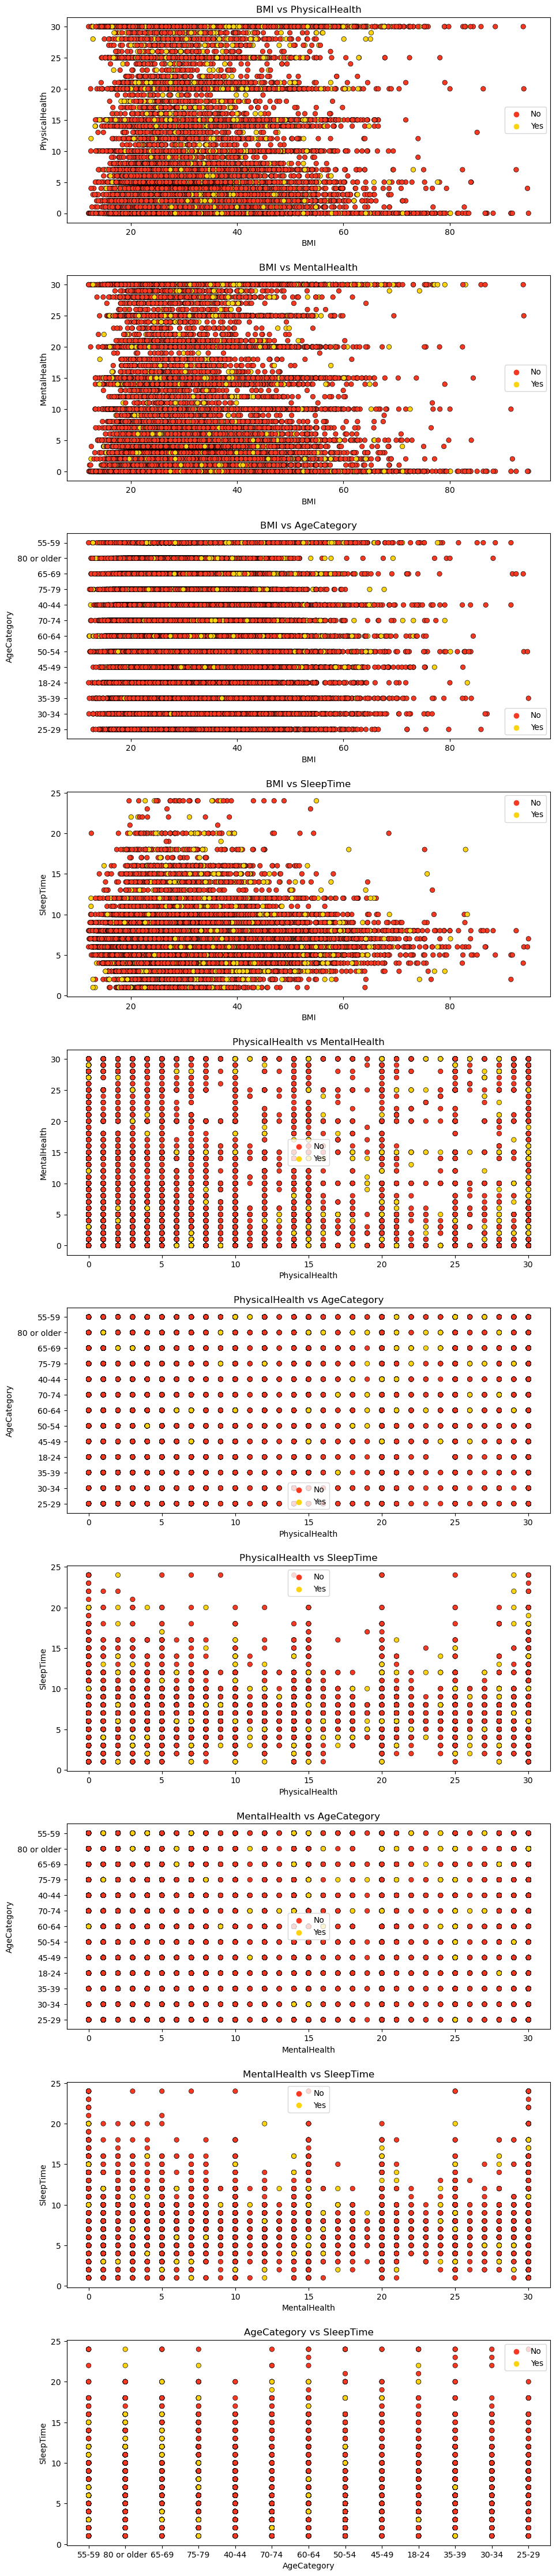

In [37]:
a = 0
fig,ax = plt.subplots(nrows = 10,ncols = 1,figsize = (10,45))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(10,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend()
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)
fig.tight_layout(pad = 2) 

### Correlation Matrix :

In [38]:
fig = px.imshow(df1[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

## seperate x, y

In [39]:
x = df1.drop('HeartDisease',axis=1)
y = df1['HeartDisease'] 

In [40]:
x.shape

(301717, 17)

In [41]:
y.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### Random Over Sampling

In [42]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=100)
x_new , y_new = over.fit_resample(x,y)

- We use RandomOverSampler for Balanced dataset.

In [43]:
x_new.shape

(548912, 17)

In [44]:
y_new.value_counts()

0    274456
1    274456
Name: HeartDisease, dtype: int64

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; text-align: center; line-height: 0.35;background-color:#00A693"><b>Fit the Model with various Algorithms</b><br></h1>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42)

In [47]:
xtrain.shape

(411684, 17)

In [48]:
xtest.shape

(137228, 17)

In [49]:
def model(classifier):
    classifier.fit(xtrain, ytrain)
    prediction=classifier.predict(xtest)
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy Score : ",'{0:.2%}'.format(accuracy_score(ytest,prediction)))
    print("Cross Validation Score : ", '{0:2%}'.format(cross_val_score(classifier,xtrain, ytrain, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC_Plot : ",  '{0:.2%}'.format(roc_auc_score(ytest,prediction)))
    RocCurveDisplay.from_estimator(classifier, xtest, ytest)
    plt.title("ROC_AUC_Plot")
    plt.show()

def model_evaluation(classifier):
    cm=confusion_matrix(ytest, classifier.predict(xtest))
    names=['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts=[value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels=[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(names, counts, percentages)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')
    
    print(classification_report(ytest,classifier.predict(xtest)))
    
    

###  Logistic Regression :

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy Score :  73.48%
Cross Validation Score :  81.362724%
ROC_AUC_Plot :  73.48%


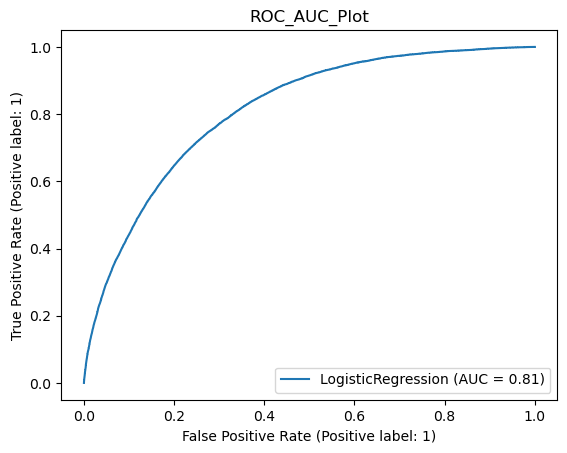

In [52]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     68436
           1       0.73      0.74      0.74     68792

    accuracy                           0.73    137228
   macro avg       0.73      0.73      0.73    137228
weighted avg       0.73      0.73      0.73    137228



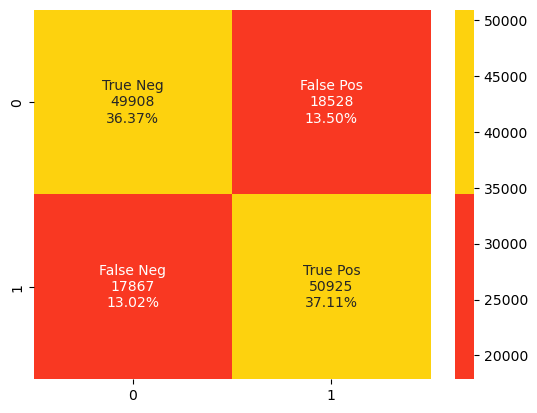

In [53]:
model_evaluation(classifier_lr)

### XGBoost Classifier

In [54]:
import xgboost 
from xgboost import XGBClassifier

In [55]:
classifier_xgb=XGBClassifier()

Accuracy Score :  78.09%
Cross Validation Score :  85.969457%
ROC_AUC_Plot :  78.08%


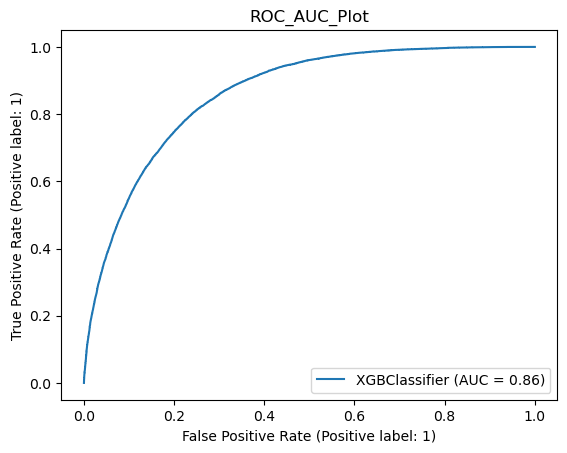

In [56]:
model(classifier_xgb)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     68436
           1       0.76      0.82      0.79     68792

    accuracy                           0.78    137228
   macro avg       0.78      0.78      0.78    137228
weighted avg       0.78      0.78      0.78    137228



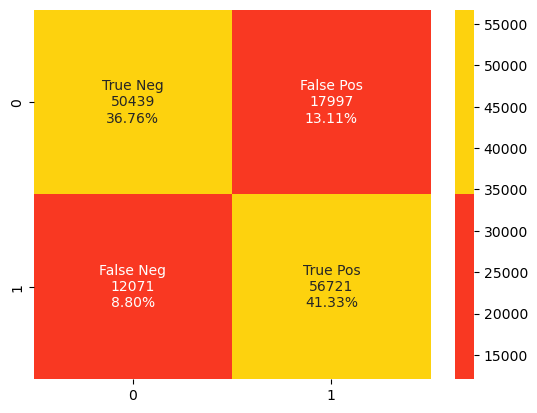

In [57]:
model_evaluation(classifier_xgb)

### KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(leaf_size=3,n_neighbors=3, p=1)

Accuracy Score :  91.97%
Cross Validation Score :  94.842556%
ROC_AUC_Plot :  91.95%


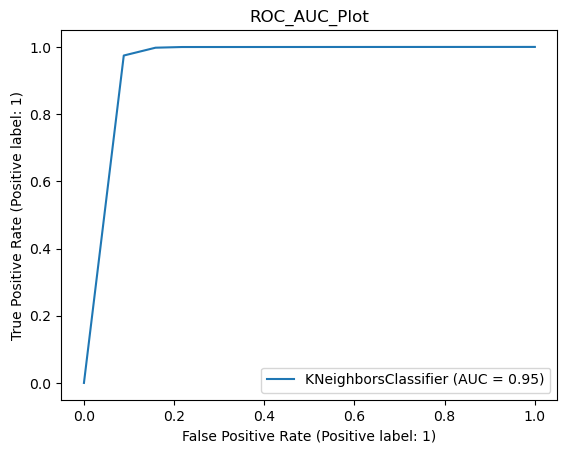

In [59]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     68436
           1       0.86      1.00      0.93     68792

    accuracy                           0.92    137228
   macro avg       0.93      0.92      0.92    137228
weighted avg       0.93      0.92      0.92    137228



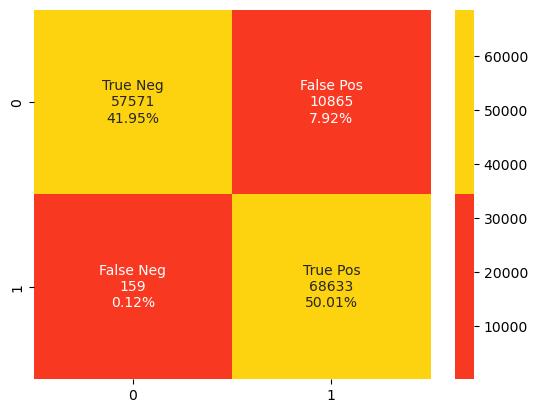

In [60]:
model_evaluation(classifier_knn)

### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
classifier_dt=DecisionTreeClassifier()

Accuracy Score :  95.19%
Cross Validation Score :  94.706596%
ROC_AUC_Plot :  95.18%


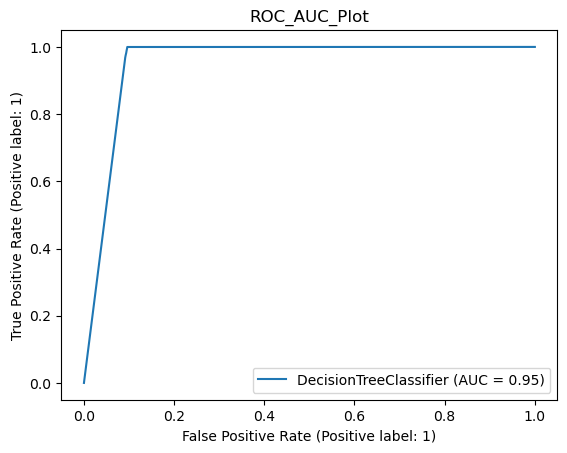

In [63]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     68436
           1       0.91      1.00      0.95     68792

    accuracy                           0.95    137228
   macro avg       0.96      0.95      0.95    137228
weighted avg       0.96      0.95      0.95    137228



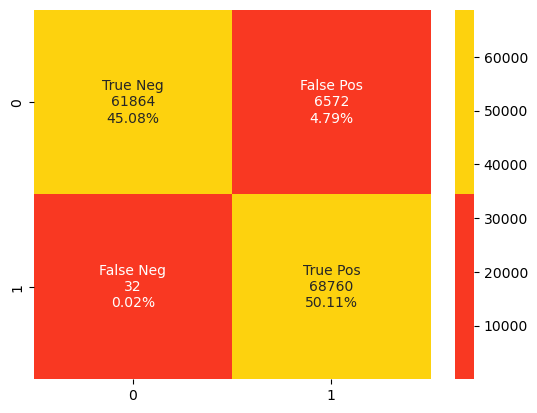

In [64]:
model_evaluation(classifier_dt)

### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()

Accuracy Score :  96.68%
Cross Validation Score :  99.649934%
ROC_AUC_Plot :  96.67%


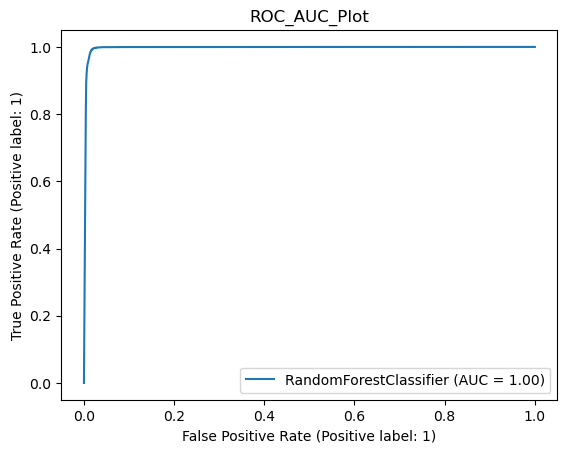

In [66]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     68436
           1       0.94      1.00      0.97     68792

    accuracy                           0.97    137228
   macro avg       0.97      0.97      0.97    137228
weighted avg       0.97      0.97      0.97    137228



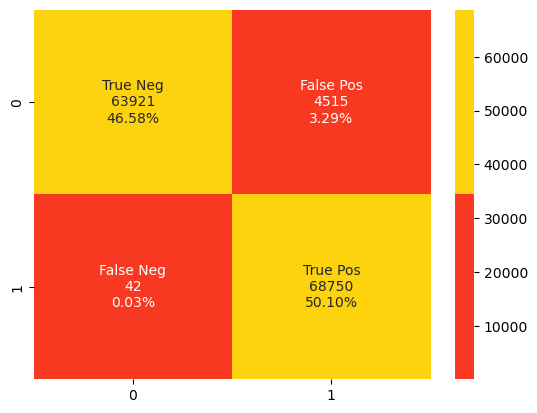

In [67]:
model_evaluation(classifier_rf)

### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|73.48%|81.36%|73.48%|
|2|XGBoost Classifier|78.09%|85.96%|78.08%|
|3|KNN Classifier|91.97%|94.84%|91.95%|
|4|Decision Tree Classifier|95.24%|94.70%|95.23%|
|5|Random Forest Classfier|96.71%|99.65%|96.70%|

Reference:

1.https://www.cdc.gov/heartdisease/about.htm

2.https://www.onlymyhealth.com/heart-disease-types-symptoms-causes-treatment-1663943248

3.https://www.kaggle.com/tanmay111999

5.https://www.aiquest.org/

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 20px; text-align: center; line-height: 0.75;background-color:#00A693"><b>Please Upvote this notebook as it encourages me in doing better.</b><br> </h1>